# House Prices

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

## Importing Packages

In [305]:
import os
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay,roc_auc_score,plot_roc_curve,mean_squared_error,mean_absolute_percentage_error

## Importing Datasets

In [306]:
train_dataset = pd.read_csv('train.csv', engine = 'python')
test_dataset = pd.read_csv('test.csv', engine = 'python')
#total_dataset = pd.concat([train_dataset,test_dataset])

## Initial Data Exploration

In [307]:
# General info about the train dataset
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [308]:
pd.set_option('display.max_columns', None)
train_dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [309]:
# Checking what type of distinct columns types we have
set(list(train_dataset.dtypes))

{dtype('int64'), dtype('float64'), dtype('O')}

In [310]:
# Checking count of the distinct values. 
Counter(train_dataset.dtypes)

Counter({dtype('int64'): 35, dtype('O'): 43, dtype('float64'): 3})

81 columns in total. 79 features that can be used for the model. We can see that we have a few missing values as the total amount of rows is 1460 and a few features have less non-null values than that. We also have 3 distinct type of columns, integer,float and object. 34 integer, 43 object and 3 float.

## Data Cleaning

In [311]:
# Checking for duplicates
duplicated_train=train_dataset.duplicated().sum()
duplicated_test=test_dataset.duplicated().sum()

print_duplicate = (f"Train Duplicate Count : {duplicated_train} \n"
                  f"Test Duplicate Count: {duplicated_test}")
    
print(print_duplicate)

Train Duplicate Count : 0 
Test Duplicate Count: 0


### Missing values

In [312]:
# Checking for Nulls
missing_values_prop = (train_dataset.isna().sum()/len(train_dataset)).sort_values(ascending = False)
len(missing_values_prop[missing_values_prop > 0])

19

14 columns have missing values. Will be checking if there are a few feautres that have a high number of missing values

In [313]:
missing_prop_top = (train_dataset.isna().sum()/len(train_dataset)).sort_values(ascending = False).head(20)
missing_prop_top

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

In [314]:
missing_prop_top

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

Based on the variable description, we can see that NaN values for PoolQC,Alley,MiscFeature,Fence,FireplaceQu, the features starting with Garage and Bsmt are actually denoting None, meaning that the feature does not exist. In these kind of cases, we will keep the NaN's put transform them to a category in the variable.

In [315]:
# Dropping variables that actually have missing value
missing_prop_top_relevant_nan = missing_prop_top.drop(index = ['LotFrontage','MasVnrArea','Electrical'])
missing_prop_top_relevant_nan


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrType      0.005479
Utilities       0.000000
dtype: float64

In [316]:
# Checking column types
nan_columns = list()
for column in missing_prop_top_relevant_nan.index:
    dtype = train_dataset[column].dtype
    
    print(dtype,column)

object PoolQC
object MiscFeature
object Alley
object Fence
object FireplaceQu
object GarageCond
object GarageType
float64 GarageYrBlt
object GarageFinish
object GarageQual
object BsmtExposure
object BsmtFinType2
object BsmtFinType1
object BsmtCond
object BsmtQual
object MasVnrType
object Utilities


In [317]:
# Handling object columns first
relevant_nan_columns = missing_prop_top_relevant_nan.index
relevant_nan_columns = relevant_nan_columns.tolist()
relevant_nan_columns.remove("GarageYrBlt")

In [318]:
# Replacing NaN's with the category None
for column in relevant_nan_columns:
    train_dataset[column] = train_dataset[column].replace(np.NaN,'None')

In [319]:
# There are 4 more features with NaN's. Handling them one by one.

# LotFrontange. Will be replacing with the mean
train_dataset.LotFrontage = train_dataset.LotFrontage.replace(np.NaN,train_dataset.LotFrontage.mean())

# MasVnrArea. Will be replacing NaN's with 0. Since the missing values seem to come when MasVnrType = None
train_dataset.MasVnrArea = np.where(train_dataset.MasVnrArea.isnull(),0,train_dataset.MasVnrArea)

# Electrical. Categorical variable. Replacing with NaNs with the most frequent level.

train_dataset.Electrical = train_dataset.Electrical.replace(np.NaN,train_dataset.Electrical.mode()[0])

# RoofMatl. Categorical variable. Replacing with NaNs with the most frequent level.

train_dataset.RoofMatl = train_dataset.RoofMatl.replace(np.NaN,train_dataset.RoofMatl.mode()[0])

# GarageYrBlt. Replacing with mean. 

train_dataset.GarageYrBlt = train_dataset.GarageYrBlt.replace(np.NaN,train_dataset.GarageYrBlt.mean())

In [320]:
# Checking if there are any missing values
(train_dataset.isna().sum()/len(train_dataset)).sort_values(ascending = False).head(20)

SalePrice       0.0
Heating         0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
YearRemodAdd    0.0
dtype: float64

## Exploratory Data Analysis

#### Target Variable

In [321]:
# Starting to look into that dependent variable SalesPrice
train_dataset.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

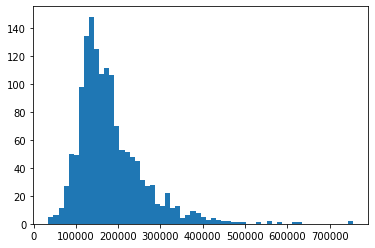

In [322]:
# Histogram
plt.hist(data=train_dataset, x = 'SalePrice', bins=60, log = False)
plt.show()

Almost Normally distributed with a slight positive skewness.

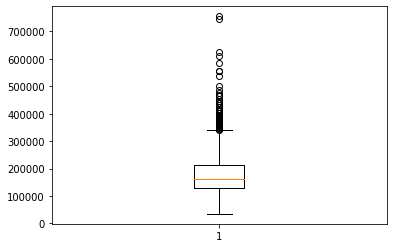

In [323]:
# Boxplot
plt.boxplot(train_dataset.SalePrice)
plt.show()

### Features

Will begin by dividing the feature in their respective dtype

In [324]:
feature_dataset = train_dataset.drop(columns = 'SalePrice')
feature_columns = feature_dataset.columns

In [325]:
# Checking how many unique column types there are.
feature_dataset.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [326]:
integer_columns = list()
object_columns = list()
float64_columns = list() 

for column in feature_columns:
    dtype = feature_dataset[column].dtypes
    if dtype == 'int64':
        integer_columns.append(column)
    elif dtype == 'object':
        object_columns.append(column)
    elif dtype == 'float64':
        float64_columns.append(column)


### Multivariate EDA

#### Heatmap for quantitative features

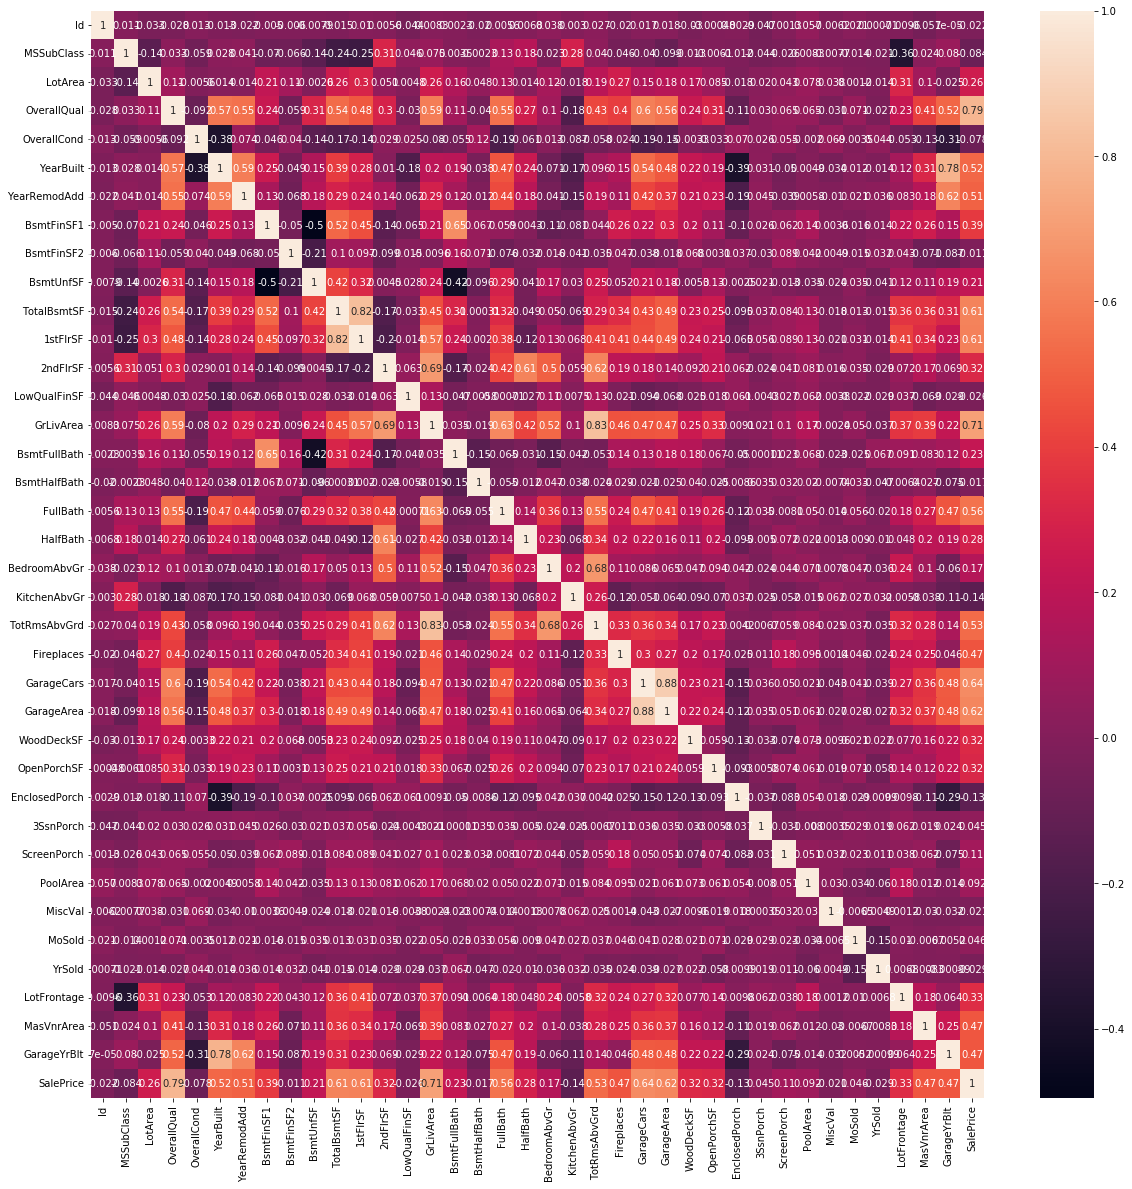

In [327]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(train_dataset[integer_columns + float64_columns + ['SalePrice']].corr(), ax = ax, annot = True)

In [328]:
# Getting features that have low correlation with the target. 
correlation_matrix = train_dataset[integer_columns + float64_columns + ['SalePrice']].corr()
correlation_matrix = correlation_matrix[correlation_matrix.index == 'SalePrice']
low_correlation_columns = correlation_matrix[(correlation_matrix > -0.5) & (correlation_matrix < 0.5)].dropna(axis = 1).columns
low_correlation_columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage',
       'MasVnrArea', 'GarageYrBlt'],
      dtype='object')

The features above have low correlation with the target. Will be removing them in the Feature Engineering section

In [329]:
# Getting explanatory features that are highly correlated
correlation_matrix_no_target = train_dataset[integer_columns + float64_columns + ['SalePrice']].drop(columns = 'SalePrice').corr()
high_corr_columns  = correlation_matrix_no_target[(correlation_matrix_no_target < -0.8) | (correlation_matrix_no_target > 0.8 )]
high_corr_columns



,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallCond,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtUnfSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see a few high correlations. More specifically : \
TotalBsmtSF & 1stFlrSF \
TotRmsAbvGrd & GrLivArea \
GarageCars & GarageArea 

Will be dropping TotalBsmtSF,TotRmsAbvGrd,GarageCars in the Feaute Engineering section


In [330]:
correlated_features_removal = ['TotalBsmtSF','TotRmsAbvGrd','GarageCars']

### Categorical Variables Univariate EDA

In [331]:
# Will being by checking for high cardinality
cardinality_array = list()
for column in object_columns:
    unique_values_over_total=len(train_dataset[column].unique())/len(train_dataset)*100
    cardinality_array.append(unique_values_over_total)

In [332]:
# Checking max cardinality value
max(cardinality_array)

1.7123287671232876

The highest proportion of cardinality that we have is 1.7%, so that is definitely low. This means we have a small number of unique levels in our categorical features, which is good.

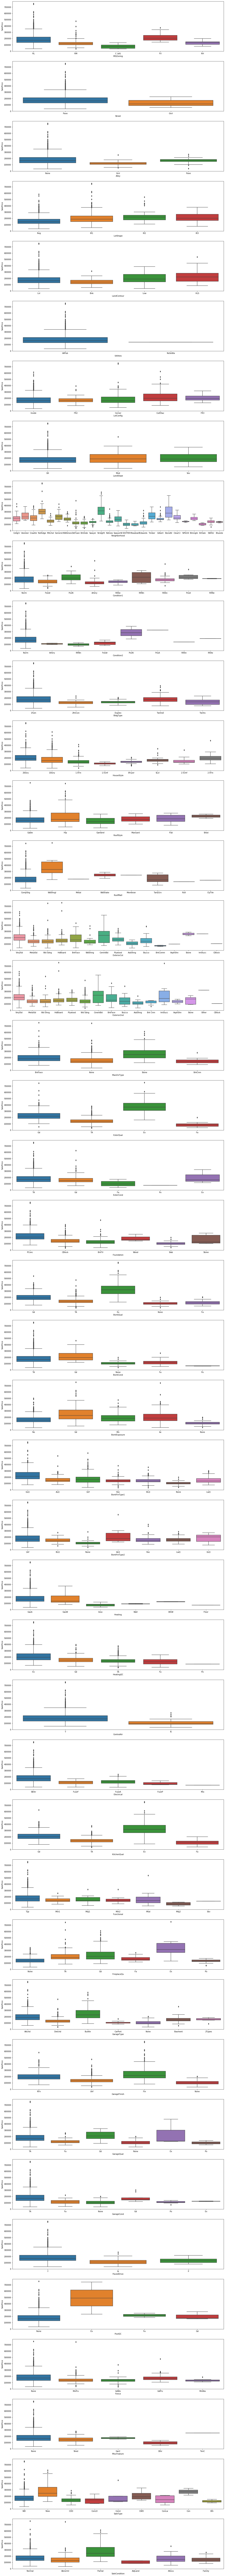

In [333]:
plot_count = len(object_columns)
count = 0
fig, ax = plt.subplots(plot_count,1 , figsize = (20,250))
for column in object_columns: 
    sns.boxplot(data=train_dataset, x=column, y='SalePrice', ax = ax[count])
    count += 1

We do see that a few of the levels in some of the categorical variables have a high impact of SalePrice. Such an example is the the quality of the Pool, Kitchen and External Quality

In [334]:
# Checking the variable Utilities. 2 categories, with only 1 observation on. Will be removing it in the Feature Engineering Section. 
train_dataset['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

### Float Features Univariate EDA

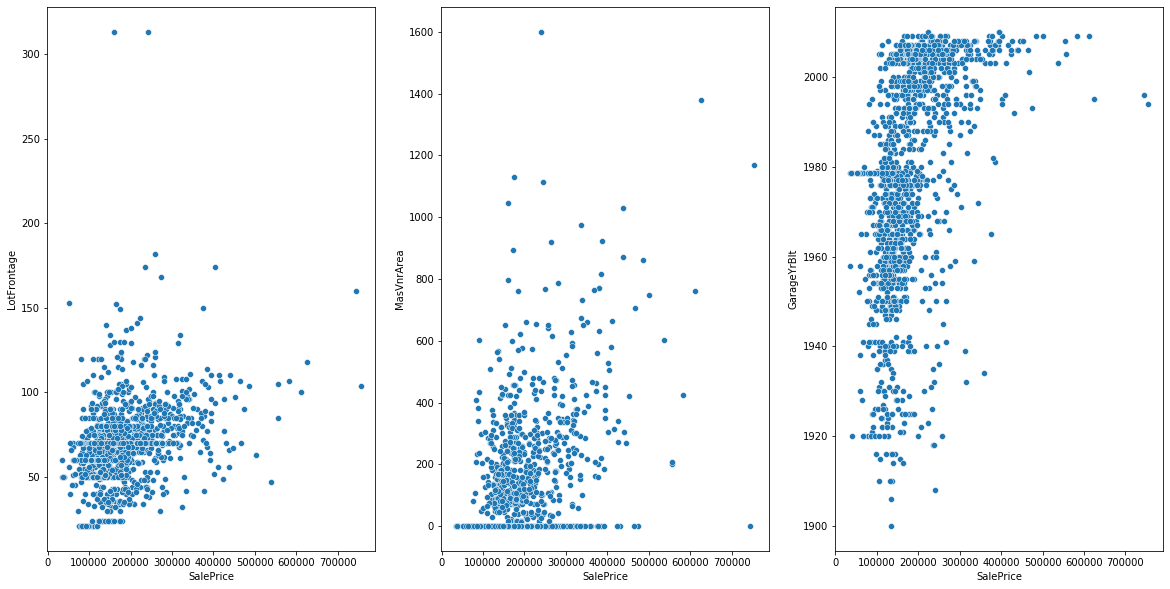

In [335]:
# Plotting a scatterplot between the target and the three float variables. 
fig, ax = plt.subplots(1,3,figsize=(20,10))
sns.scatterplot(data = train_dataset, x = 'SalePrice', y = 'LotFrontage', ax=ax[0])
sns.scatterplot(data = train_dataset, x = 'SalePrice', y = 'MasVnrArea', ax=ax[1])
sns.scatterplot(data = train_dataset, x = 'SalePrice', y = 'GarageYrBlt', ax=ax[2])

### Integer Features Univariate EDA

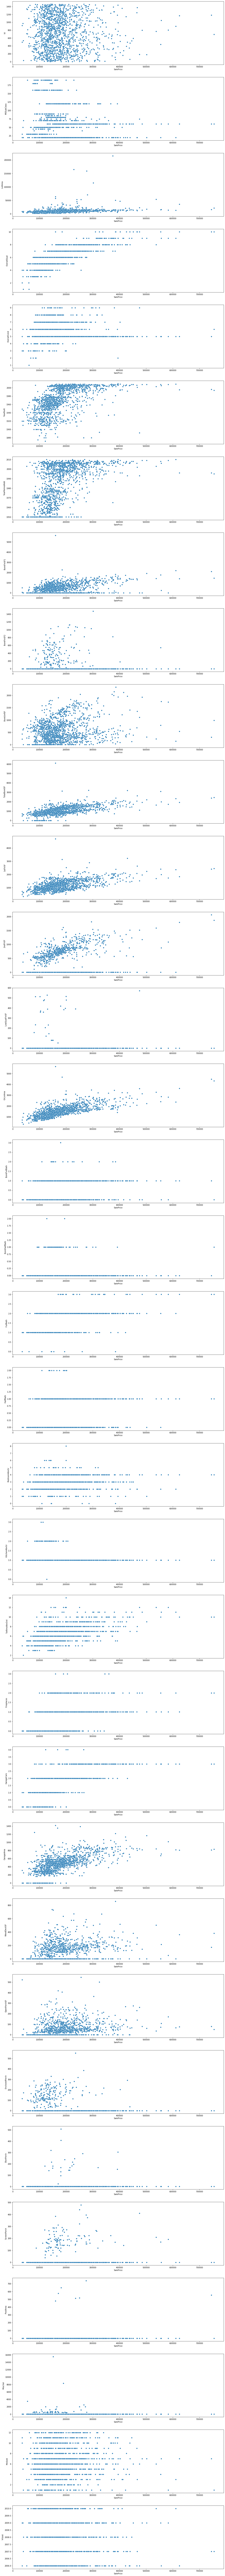

In [336]:
rows = len(integer_columns)
count = 0
fig, ax = plt.subplots(rows,1 , figsize = (20,250))
for column in integer_columns: 
    sns.scatterplot(data = train_dataset, x = 'SalePrice', y = column, ax=ax[count])
    count += 1

We can see from the above graphs that most of the features are ordinal in nature. The only ones that can be seen as nominal are Year and Month. 

## Feature Engineering

In [337]:
# Removing variables that have low correlation with the target, and variables that are highly correlated with each other.
train_dataset = train_dataset.drop(columns = list(low_correlation_columns) + list(correlated_features_removal), errors='ignore')

# Removing Utilities due to it having two levels, with one level having only 1 observation

train_dataset = train_dataset.drop(columns = 'Utilities')

train_dataset_copy = train_dataset.copy()


In [338]:
# Creating a function to fuse/combine categories in nominal or ordinal features in order to decrease the chance for curse of dimensionality.
# We for example, see that there are many features such as Neighborhood, Exterior1st and Exterior2nd that have many levels. We will be reducing it to 4 levels per categorical variable. 
# The combining will be done by looking at the mean price per feature, and creating 4 levels based on the price.

def combine_categories(train_dataset,column,new_column_name,suffix_for_new_categories):
    feature_groupby_mean = train_dataset[[column,'SalePrice']].groupby([column]).mean()
    quantiles = train_dataset[[column,'SalePrice']].groupby([column]).mean().quantile([0,0.25,0.5,0.75,1])
    min_quantile = quantiles.iloc[0][0]
    first_quantile = quantiles.iloc[1][0]
    median_quantile = quantiles.iloc[2][0]
    third_quantile = quantiles.iloc[3][0]
    max_quantile = quantiles.iloc[4][0]

    first_quantile_columns = feature_groupby_mean[feature_groupby_mean.SalePrice.between(min_quantile,first_quantile)].index.tolist()
    second_quantle_columns = feature_groupby_mean[feature_groupby_mean.SalePrice.between(first_quantile + 1,median_quantile)].index.tolist()
    third_quantile_columns = feature_groupby_mean[feature_groupby_mean.SalePrice.between(median_quantile + 1,third_quantile)].index.tolist()
    fourth_quantile_colums = feature_groupby_mean[feature_groupby_mean.SalePrice.between(third_quantile + 1,max_quantile)].index.tolist()
    # Side note : Adding +1 as temporary solution to control for overlapping groups. 

    def map_function(column):
        if column in first_quantile_columns:
            category  = f'low_priced_{suffix_for_new_categories}'
        elif column in second_quantle_columns:
            category  = f'medium_priced_{suffix_for_new_categories}'
        elif column in third_quantile_columns:
            category  = f'high_priced_{suffix_for_new_categories}'
        elif column in fourth_quantile_colums:
            category  = f'very_high_priced_{suffix_for_new_categories}'
        return category

    train_dataset[new_column_name] = train_dataset[column].apply(map_function)



In [339]:
combine_categories(train_dataset,'Neighborhood','Neighborhood_type','Neighborhood')
combine_categories(train_dataset,'Exterior1st','Exterior1st_type','Exterior1st')
combine_categories(train_dataset,'Exterior2nd','Exterior2nd_type','Exterior2nd')

train_dataset = train_dataset.drop(columns = ['Neighborhood','Exterior1st','Exterior2nd'])

# Modelling

### Pre-processing

In [340]:
# Model preprocessing 
target_variable = train_dataset.SalePrice
feature_variables = train_dataset.drop(columns = 'SalePrice')

In [341]:
object_model_columns = feature_variables.select_dtypes(include = 'object').columns.tolist()
integer_model_columns = feature_variables.select_dtypes(include = 'int64').columns.tolist()

In [342]:
#perform one-hot encoding on 'team' column 
dummie_object_feature = pd.get_dummies(feature_variables[object_model_columns])

#merge one-hot encoded columns back with original DataFrame
feature_variables = feature_variables.join(dummie_object_feature)

# Dropping original columns
feature_variables = feature_variables.drop(columns = object_model_columns)

In [343]:
# Dividing the dataset into training and validation
x_train, x_validation, y_train, y_validation = train_test_split(feature_variables, target_variable, test_size=0.20, random_state=0)


### Model Creation

In [344]:
# Training a Random Forest Model
random_forest_model = RandomForestRegressor(n_estimators=1800,min_samples_split = 5, min_samples_leaf = 2, max_depth = 10, bootstrap = True)

# Fitting our training dataset to the model
random_forest_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=1800)

In [345]:
# Training a Gradient Boost
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators = 1800, min_samples_split=2, min_samples_leaf=1, max_depth = 10)

gradient_boosting_regressor.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=1800)

In [346]:
# Training a Linear Regression Model
linear_regression = LinearRegression()

linear_regression.fit(x_train,y_train)

LinearRegression()

### Validation Dataset

In [347]:
# Creating lists of predicted values for each model
predicted_x_validation_random_forest = random_forest_model.predict(x_validation)
predicted_x_validation_gradient_boost = gradient_boosting_regressor.predict(x_validation)
predicted_x_validation_linear_regression = linear_regression.predict(x_validation)

In [348]:
# Random Forest Performance Metrics
root_mean_squared_error_random_forest = (sum((y_validation - predicted_x_validation_random_forest)**2)/len(y_validation))**0.5
mean_absolute_percentage_error_random_forest = mean_absolute_percentage_error(y_validation,predicted_x_validation_random_forest)

# Gradient Boost Performance Metrics
root_mean_squared_error_gradient_boost = (sum((y_validation - predicted_x_validation_gradient_boost)**2)/len(y_validation))**0.5
mean_absolute_percentage_error_gradient_boost = mean_absolute_percentage_error(y_validation,predicted_x_validation_gradient_boost)

# Linear Regresion Performance Metrics
root_mean_squared_error_linear_regression = (sum((y_validation - predicted_x_validation_linear_regression)**2)/len(y_validation))**0.5
mean_absolute_percentage_error_linear_regression = mean_absolute_percentage_error(y_validation,predicted_x_validation_linear_regression)

In [349]:
random_forest_evaluation = (f"RMSE : {root_mean_squared_error_random_forest} \n"
                            f"MAPE : {mean_absolute_percentage_error_random_forest} \n")

gradient_regression = (f"RMSE : {root_mean_squared_error_gradient_boost} \n"
                      f"MAPE : {mean_absolute_percentage_error_gradient_boost} \n")

linear_regression = (f"RMSE : {root_mean_squared_error_linear_regression} \n"
                     f"MAPE : {mean_absolute_percentage_error_linear_regression} \n")

In [350]:
print(random_forest_evaluation)

RMSE : 33300.85589465111 
MAPE : 0.10010164445046207 



In [351]:
print(gradient_regression)

RMSE : 33412.68829016684 
MAPE : 0.10414786321345114 



In [352]:
print(linear_regression)

RMSE : 54215.82369153219 
MAPE : 0.14415805586492747 



We can see from the results above that RandomForest and Gradient Boosting have similar performance. Linear Regression on the other hand falls behind the two with respective to RMSE and MAPE. Will be proceeding with Gradient Boosting.

## Final Model

### Hyperparameter Tuning

In [494]:
n_estimators = [100, 500, 900, 1100, 1500, 2000]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8] 
min_samples_split = [2, 4, 6, 10]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split}

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=gradient_boosting_regressor,
            param_distributions=hyperparameter_grid,
            cv=4, n_iter=50,
            scoring = 'neg_log_loss',n_jobs = 4,
            random_state=0)

random_cv.fit(x_train,y_train)

/Users/michael.troyanovsky/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning


RandomizedSearchCV(cv=4,
                   estimator=GradientBoostingRegressor(max_depth=10,
                                                       n_estimators=1800),
                   n_iter=50, n_jobs=4,
                   param_distributions={'max_depth': [2, 3, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500, 2000]},
                   random_state=0, scoring='neg_log_loss')

In [495]:
# Retreiving the best parameters
random_cv.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_depth': 10}

In [353]:
# Creating a Gradient Boost Final Model
gradient_boosting_regressor_final = GradientBoostingRegressor(n_estimators = 900, min_samples_split=2, min_samples_leaf=6, max_depth = 10)

# Fitting the final Gradient Boost Model
gradient_boosting_regressor_final.fit(feature_variables,target_variable)

GradientBoostingRegressor(max_depth=10, min_samples_leaf=6, n_estimators=900)

# Testing Dataset

In [354]:
# Checking for Nulls
missing_values_prop_test = (test_dataset.isna().sum()/len(test_dataset)).sort_values(ascending = False)
columns_with_missing_values =  missing_values_prop_test[missing_values_prop_test > 0]
len(missing_values_prop_test[missing_values_prop_test > 0])

33

We can see that we have many more features with missing values in the test dataset. The best approach, and will be applied to the next project, is concatenate the datasets and do the missing value imputation of both datasets directly

In [355]:
# Printing the columns with the missing values
(test_dataset.isna().sum()/len(test_dataset)).sort_values(ascending = False).head(33)

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageCond      0.053461
GarageQual      0.053461
GarageYrBlt     0.053461
GarageFinish    0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
BsmtHalfBath    0.001371
Utilities       0.001371
Functional      0.001371
BsmtFullBath    0.001371
BsmtFinSF2      0.000685
BsmtFinSF1      0.000685
Exterior2nd     0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
SaleType        0.000685
Exterior1st     0.000685
KitchenQual     0.000685
GarageArea      0.000685
GarageCars      0.000685
dtype: float64

By looking at the definition of the variables, we find the some of the NaNs are due to the feature not existing, such as No Basement. But some of the features do actually have missing values.

In [356]:
# Checking column types
nan_columns = list()
for column in columns_with_missing_values.index:
    dtype = test_dataset[column].dtype
    nan_columns.append(column)
    print(dtype,column)

object PoolQC
object MiscFeature
object Alley
object Fence
object FireplaceQu
float64 LotFrontage
object GarageCond
object GarageQual
float64 GarageYrBlt
object GarageFinish
object GarageType
object BsmtCond
object BsmtQual
object BsmtExposure
object BsmtFinType1
object BsmtFinType2
object MasVnrType
float64 MasVnrArea
object MSZoning
float64 BsmtHalfBath
object Utilities
object Functional
float64 BsmtFullBath
float64 BsmtFinSF2
float64 BsmtFinSF1
object Exterior2nd
float64 BsmtUnfSF
float64 TotalBsmtSF
object SaleType
object Exterior1st
object KitchenQual
float64 GarageArea
float64 GarageCars


In [357]:
object_col_with_intended_missing_values = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
object_col_with_actual_missing_values = ['MSZoning','Utilities','Functional','SaleType','Exterior2nd','Exterior1st','KitchenQual']
float_col_with_missing_values = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars']

In [358]:
# Replacing NaN's with the category None in the features where a NaN actually means None
for column in object_col_with_intended_missing_values:
    test_dataset[column] = test_dataset[column].replace(np.NaN,'None')
    
for column in object_col_with_actual_missing_values:
    test_dataset[column] = test_dataset[column].replace(np.NaN,test_dataset[column].mode()[0])
    
for column in float_col_with_missing_values:
    test_dataset[column] = test_dataset[column].replace(np.NaN,test_dataset[column].median())

In [359]:
# Checking missing values after imputation on the test dataset
missing_values_prop_test_post = (test_dataset.isna().sum()/len(test_dataset)).sort_values(ascending = False)
columns_with_missing_values_post =  missing_values_prop_test_post[missing_values_prop_test_post > 0]
len(columns_with_missing_values_post[columns_with_missing_values_post > 0])

0

### Feature Engineering Test Dataset

In [360]:
test_dataset_2 = test_dataset.copy()

In [361]:
# Removing variables that have low correlation with the target, and variables that are highly correlated with each other.
test_dataset = test_dataset.drop(columns = list(low_correlation_columns) + list(correlated_features_removal), errors='ignore')

# Removing Utilities due to it having two levels, with one level having only 1 observation

test_dataset = test_dataset.drop(columns = 'Utilities', errors='ignore')

In [363]:
def combine_categories_test_dataset(dataset,column,new_column_name,suffix_for_new_categories):
    feature_groupby_mean = train_dataset_copy[[column,'SalePrice']].groupby([column]).mean()
    quantiles = train_dataset_copy[[column,'SalePrice']].groupby([column]).mean().quantile([0,0.25,0.5,0.75,1])
    min_quantile = quantiles.iloc[0][0]
    first_quantile = quantiles.iloc[1][0]
    median_quantile = quantiles.iloc[2][0]
    third_quantile = quantiles.iloc[3][0]
    max_quantile = quantiles.iloc[4][0]

    first_quantile_columns = feature_groupby_mean[feature_groupby_mean.SalePrice.between(min_quantile,first_quantile)].index.tolist()
    second_quantle_columns = feature_groupby_mean[feature_groupby_mean.SalePrice.between(first_quantile + 1,median_quantile)].index.tolist()
    third_quantile_columns = feature_groupby_mean[feature_groupby_mean.SalePrice.between(median_quantile + 1,third_quantile)].index.tolist()
    fourth_quantile_colums = feature_groupby_mean[feature_groupby_mean.SalePrice.between(third_quantile + 1,max_quantile)].index.tolist()
    # Side note : Adding +1 as temporary solution to control for overlapping groups. 

    def map_function(column):
        if column in first_quantile_columns:
            category  = f'low_priced_{suffix_for_new_categories}'
        elif column in second_quantle_columns:
            category  = f'medium_priced_{suffix_for_new_categories}'
        elif column in third_quantile_columns:
            category  = f'high_priced_{suffix_for_new_categories}'
        elif column in fourth_quantile_colums:
            category  = f'very_high_priced_{suffix_for_new_categories}'
        return category

    dataset[new_column_name] = dataset[column].apply(map_function)

combine_categories_test_dataset(test_dataset,'Neighborhood','Neighborhood_type','Neighborhood')
combine_categories_test_dataset(test_dataset,'Exterior1st','Exterior1st_type','Exterior1st')
combine_categories_test_dataset(test_dataset,'Exterior2nd','Exterior2nd_type','Exterior2nd')

test_dataset = test_dataset.drop(columns = ['Neighborhood','Exterior1st','Exterior2nd'])

In [364]:
dummie_object_feature = pd.get_dummies(test_dataset[object_model_columns])

#merge one-hot encoded columns back with original DataFrame
test_dataset = test_dataset.join(dummie_object_feature)

# Dropping original columns
test_dataset = test_dataset.drop(columns = object_model_columns)

In [388]:
# Checking dataframe size
test_dataset.shape,feature_variables.shape

((1459, 213), (1460, 227))

We still see a mismatch in the amount of features in the training and test dataset. This is because some of the category levels exists in the training but not in the test dataset. This issue would of been resolved if we concatenated the dataframes in the start.   


In [396]:
# Checking what features are present in the training and not in the test
features_in_train_not_in_test = list()
for g in feature_variables.columns:
    if g not in (test_dataset.columns):
        print(g)
        features_in_train_not_in_test.append(g)

Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
HouseStyle_2.5Fin
RoofMatl_ClyTile
RoofMatl_Membran
RoofMatl_Metal
RoofMatl_Roll
Heating_Floor
Heating_OthW
Electrical_Mix
GarageQual_Ex
PoolQC_Fa
MiscFeature_TenC


In [400]:
feature_variables[features_in_train_not_in_test].sum().sum()

26

We see that not a lot of transactions have these values. For simplicity, will be removing these features from the training dataset and retraining the final model. Not the cleanest way to do it.

In [401]:
# Removing features from the training dataset
feature_variables = feature_variables.drop(columns = features_in_train_not_in_test)

In [403]:
len(feature_variables.columns),len(test_dataset.columns)

(213, 213)

In [404]:
# Re-fitting the final model after removing features
gradient_boosting_regressor_final.fit(feature_variables,target_variable)

GradientBoostingRegressor(max_depth=10, min_samples_leaf=6, n_estimators=900)

#### Predicting test dataset

In [414]:
predicted_sales_price_test_dataset = gradient_boosting_regressor_final.predict(test_dataset)
submission_house_prices = pd.DataFrame(test_dataset_2.Id)
submission_house_prices['SalePrice'] = predicted_sales_price_test_dataset

In [417]:
submission_house_prices.to_csv('house_prices_submission',index = False)